In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import recall_score, precision_score, f1_score

## 1 is ProRevenge 0 is MaliciousCompliance

In [4]:
df_cleaned = pd.read_csv('../data/remove_removed.csv')
feature_importance = pd.read_csv('../data/feature_importance.csv')

df_title = df_cleaned[['title', 'subreddit']]

MC_title = df_title[df_title['subreddit'] == 0]
PR_title = df_title[df_title['subreddit'] == 1]

X = df_title['title']
y = df_title['subreddit']

In [5]:
cv = CountVectorizer(ngram_range = (1,2), stop_words = 'english')

In [6]:
MCwords = pd.DataFrame(cv.fit_transform(MC_title['title']).toarray(), columns = cv.get_feature_names_out())
PRwords = pd.DataFrame(cv.fit_transform(PR_title['title']).toarray(), columns = cv.get_feature_names_out())

In [9]:
MC_15 = MCwords.sum().sort_values(ascending = False).head(15)
MC_15

want                    684
don                     477
ok                      447
okay                    375
ll                      353
sure                    306
work                    278
just                    233
compliance              231
fine                    228
got                     220
boss                    218
time                    193
malicious               187
malicious compliance    163
dtype: int64

In [8]:
PR_15 = PRwords.sum().sort_values(ascending = False).head(15)
PR_15

revenge    623
got        408
gets       235
ll         219
fired      209
bully      202
don        199
school     194
friend     194
life       181
ex         173
make       155
boss       144
enjoy      132
teacher    127
dtype: int64

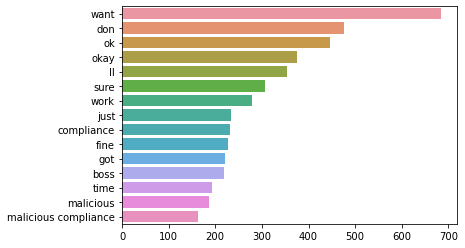

In [10]:
sns.barplot(x = MC_15.values, y = MC_15.index);

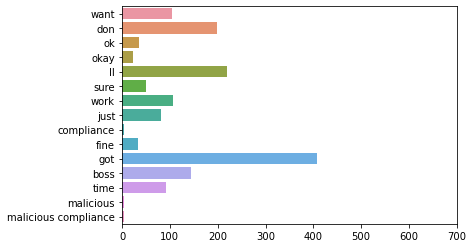

In [11]:
sns.barplot(x = PRwords[MC_15.index].sum(), y = MC_15.index);
plt.xlim([0, 700]);

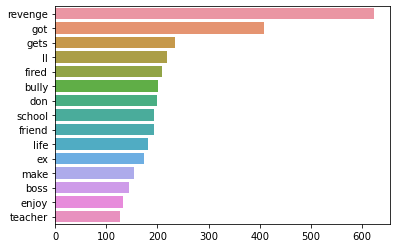

In [12]:
sns.barplot(x = PR_15.values, y = PR_15.index);

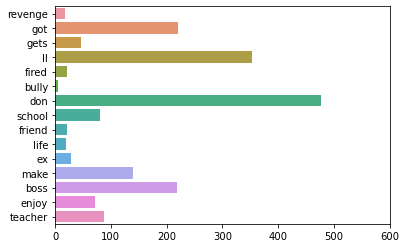

In [13]:
sns.barplot(x = MCwords[PR_15.index].sum(), y = PR_15.index);
plt.xlim([0, 600]);

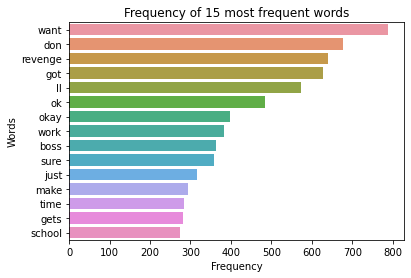

In [18]:
Allwords = pd.DataFrame(cv.fit_transform(X).toarray(), columns = cv.get_feature_names_out())
Allwords15 = Allwords.sum().sort_values(ascending = False).head(15)
sns.barplot(x = Allwords15.values, 
            y = Allwords15.index).set(title = 'Frequency of 15 most frequent words',
                                     ylabel = 'Words',
                                     xlabel = 'Frequency');
plt.savefig('../visuals/15mostfrequent.png')

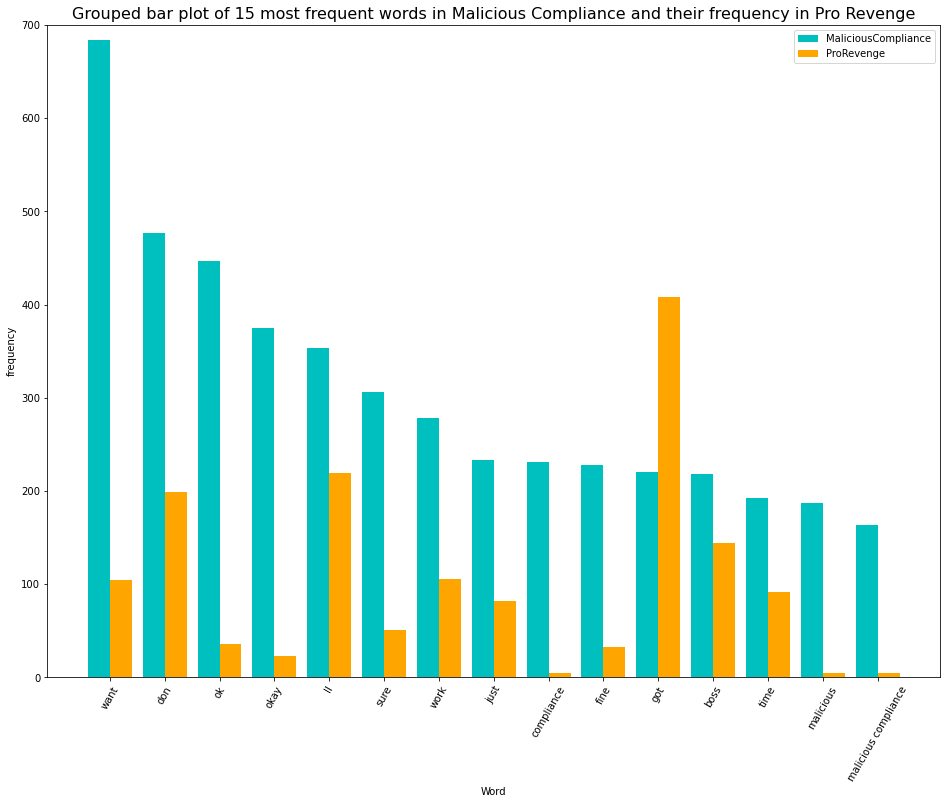

In [30]:
x = np.arange(len(MC_15.index))
width = 0.4

plt.figure(figsize = (16, 12))
plt.bar(x - width/2, MC_15.values, width, color = 'c')
plt.bar(x + width/2, PRwords[MC_15.index].sum(), width,  color = 'orange')
plt.xticks(ticks = x, labels = MC_15.index, rotation = 60)
plt.title('Grouped bar plot of 15 most frequent words in Malicious Compliance and their frequency in Pro Revenge',
         fontsize = 16);
plt.xlabel('Word')
plt.ylabel('frequency')
plt.legend(['MaliciousCompliance', 'ProRevenge'])
plt.ylim([0, 700])
plt.savefig('../visuals/MCvsPRGroupedbar.png');

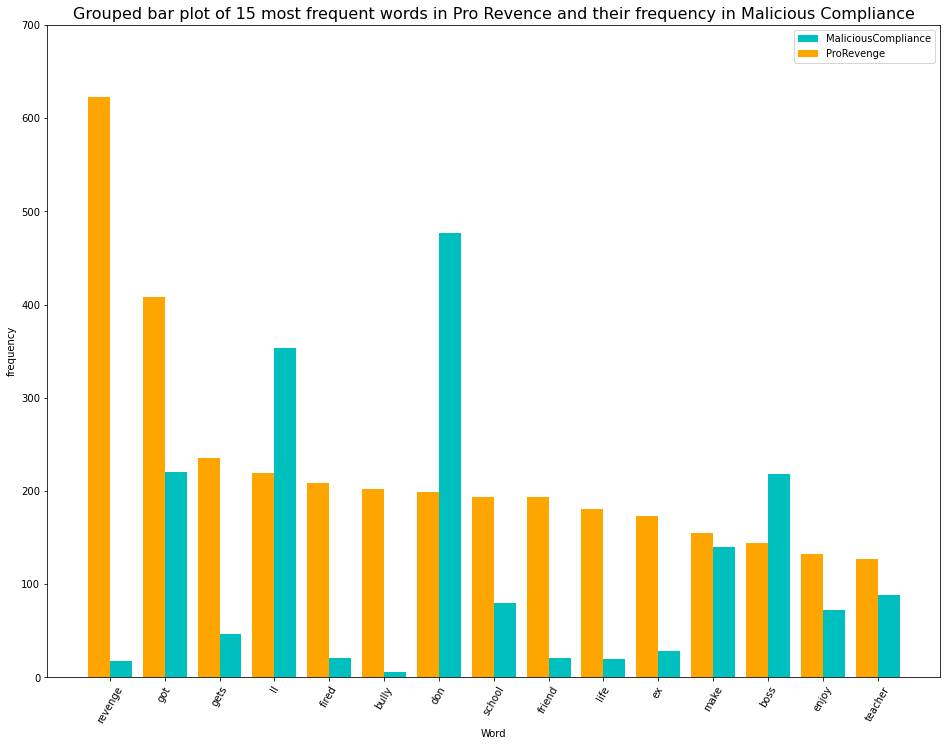

In [31]:
plt.figure(figsize = (16, 12))
plt.bar(x + width/2, MCwords[PR_15.index].sum(), width, color = 'c')
plt.bar(x - width/2, PR_15.values, width, color = 'orange')
plt.xticks(ticks = x, labels = PR_15.index, rotation = 60)
plt.title('Grouped bar plot of 15 most frequent words in Pro Revence and their frequency in Malicious Compliance', 
          fontsize = 16);
plt.xlabel('Word')
plt.ylabel('frequency')
plt.legend(['MaliciousCompliance', 'ProRevenge'])
plt.ylim([0, 700])
plt.savefig('../visuals/PRvsMCGroupedbar.png');

In [21]:
feature_importance.head(15)

,Variable,Importance
0,revenge,0.042939
1,want,0.015193
2,bully,0.012536
3,ok,0.012479
4,okay,0.011705
5,fired,0.008170
6,friend,0.007756
7,compliance,0.007135
8,life,0.006568
9,sure,0.005456


/Users/danielsun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


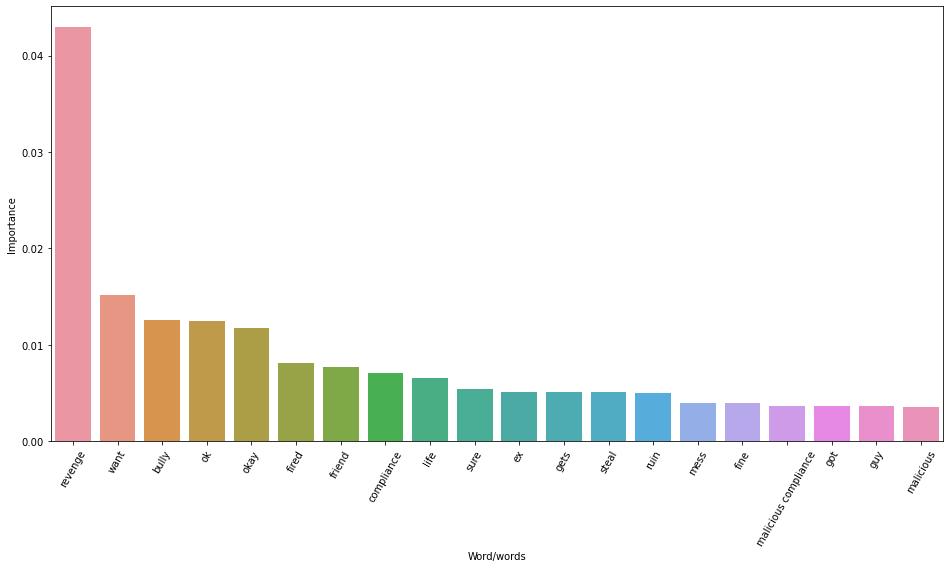

In [22]:
plt.figure(figsize = (16, 8))
sns.barplot(feature_importance['Variable'].head(20), feature_importance['Importance'].head(20))
plt.xticks(rotation = 60)
plt.xlabel('Word/words');
plt.savefig('../visuals/features_bar.png')

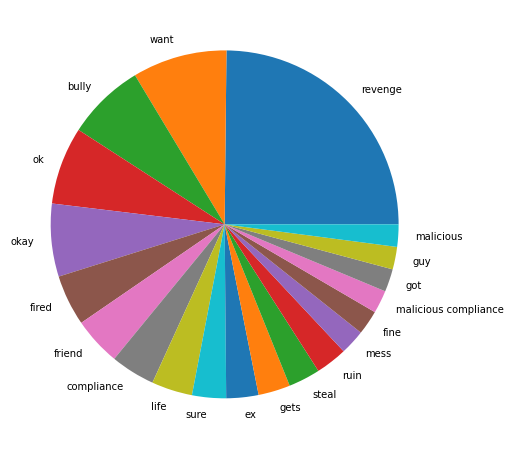

In [23]:
plt.figure(figsize = (16, 8))
plt.pie(labels = feature_importance['Variable'].head(20), x = feature_importance['Importance'].head(20), normalize = True)
plt.savefig('../visuals/feature_pie.png');